In [100]:
import matplotlib.pyplot as plt
import numpy as np
import pickle
from sklearn.metrics import pairwise_distances
import pandas as pd
import scipy.stats as ss
import seaborn as sns
from mpl_toolkits.axes_grid1 import make_axes_locatable
from scipy.stats import kstest

z_thresh = 4
filepath = "F:/Two-Photon/Psilocybin Project/Evoked Cohort Mice/"

In [6]:
def get_active_cells(traces):

    # going to return a dictionary with only active cells, formatted exactly the same as traces

    d = dict.fromkeys(traces.keys())

    for cell in traces:
        if traces[cell]['active'] == True:
            d[cell] = traces[cell]
        else:
            d.pop(cell,None)

    return d

In [7]:
def find_max_column(arr):
    # Find the column index of the global maximum value in the flattened array
    global_max_index = np.argmax(arr)

    # Convert the flattened index to row and column indices
    row_index, global_max_column_index = np.unravel_index(global_max_index, arr.shape)

    return global_max_column_index

In [9]:
# Load all required files for the saline recording day

# saline_1_184 = "C:/Users/Conor/Documents/Imaging_Data/Two-Photon/Psilocybin_Project/Evoked_Cohort_Mice/ID184/11282022_GCaMP6s_ID184_saline/TSeries-11282022-0011-023/suite2p/plane0/cells.pkl"
# saline_2_184 = "C:/Users/Conor/Documents/Imaging_Data/Two-Photon/Psilocybin_Project/Evoked_Cohort_Mice/ID184/11282022_GCaMP6s_ID184_saline/TSeries-11282022-0011-025/suite2p/plane0/cells.pkl"

saline_1_186 = "F:/Two-Photon/Psilocybin Project/Evoked Cohort Mice/ID186/11242022_GCaMP6s_ID186_saline/TSeries-11222022-1228-021/suite2p/plane0/cells.pkl"
saline_2_186 = "F:/Two-Photon/Psilocybin Project/Evoked Cohort Mice/ID186/11242022_GCaMP6s_ID186_saline/TSeries-11222022-1228-022/suite2p/plane0/cells.pkl"

saline_1_237 = "F:/Two-Photon/Psilocybin Project/Evoked Cohort Mice/ID237/12082022_GCaMP6s_ID237_saline/TSeries-12082022-1143-031/suite2p/plane0/cells.pkl"
saline_2_237 = "F:/Two-Photon/Psilocybin Project/Evoked Cohort Mice/ID237/12082022_GCaMP6s_ID237_saline/TSeries-12082022-1143-032/suite2p/plane0/cells.pkl"

saline_1_239 = "F:/Two-Photon/Psilocybin Project/Evoked Cohort Mice/ID239/01132023_ID239_saline/TSeries-01122023-1243-038/suite2p/plane0/cells.pkl"
saline_2_239 = "F:/Two-Photon/Psilocybin Project/Evoked Cohort Mice/ID239/01132023_ID239_saline/TSeries-01122023-1243-039/suite2p/plane0/cells.pkl"

saline_1_251 = "F:/Two-Photon/Psilocybin Project/Evoked Cohort Mice/ID251/ID251_13012023_saline/TSeries-01122023-1243-040/suite2p/plane0/cells.pkl"
saline_2_251 = "F:/Two-Photon/Psilocybin Project/Evoked Cohort Mice/ID251/ID251_13012023_saline/TSeries-01122023-1243-041/suite2p/plane0/cells.pkl"

saline_1_269 = "F:/Two-Photon/Psilocybin Project/Evoked Cohort Mice/ID269/ID269_06032023_saline/TSeries-03062023-1216-061/suite2p/plane0/cells.pkl"
saline_2_269 = "F:/Two-Photon/Psilocybin Project/Evoked Cohort Mice/ID269/ID269_06032023_saline/TSeries-03062023-1216-062/suite2p/plane0/cells.pkl"

saline_1_276 = "F:/Two-Photon/Psilocybin Project/Evoked Cohort Mice/ID276/ID276_03032023_saline/TSeries-03032023-1447-059/suite2p/plane0/cells.pkl"
saline_2_276 = "F:/Two-Photon/Psilocybin Project/Evoked Cohort Mice/ID276/ID276_03032023_saline/TSeries-03032023-1447-060/suite2p/plane0/cells.pkl"

saline_1_473 = "F:/Two-Photon/Psilocybin Project/Evoked Cohort Mice/ID473/saline/TSeries-01142009-2331-135/suite2p/plane0/cells.pkl"
saline_2_473 = "F:/Two-Photon/Psilocybin Project/Evoked Cohort Mice/ID473/saline/TSeries-01142009-2331-136/suite2p/plane0/cells.pkl"

saline_1_474 = "F:/Two-Photon/Psilocybin Project/Evoked Cohort Mice/ID474/saline/TSeries-01142009-2331-137/suite2p/plane0/cells.pkl"
saline_2_474 = "F:/Two-Photon/Psilocybin Project/Evoked Cohort Mice/ID474/saline/TSeries-01142009-2331-138/suite2p/plane0/cells.pkl"

all_dicts_saline_1 = [saline_1_186,saline_1_237,saline_1_239,saline_1_251,saline_1_269,saline_1_276,saline_1_473,saline_1_474]
all_dicts_saline_2 = [saline_2_186,saline_2_237,saline_2_239,saline_2_251,saline_2_269,saline_2_276,saline_2_473,saline_2_474]
all_dicts_saline_1_str = ["saline_1_186","saline_1_237","saline_1_239","saline_1_251","saline_1_269","saline_1_276","saline_1_473","saline_1_474"]
all_dicts_saline_2_str =  ["saline_2_186","saline_2_237","saline_2_239","saline_2_251","saline_2_269","saline_2_276","saline_2_473","saline_2_474"]
saline_dict_1 ={}
saline_dict_2 = {}

for file in all_dicts_saline_1_str:
    saline_dict_1[file]=None

for file in all_dicts_saline_2_str:
    saline_dict_2[file] = None

zippedsaline = zip(all_dicts_saline_1, all_dicts_saline_1_str)
for k,v in zippedsaline:
    with open(k,'rb') as f:
        saline_dict_1[v] = pickle.load(f)

zippedpsilo = zip(all_dicts_saline_2, all_dicts_saline_2_str)
for k,v in zippedpsilo:
    with open(k,'rb') as f:
        saline_dict_2[v] = pickle.load(f)


In [11]:

cell_list_1 = list(saline_dict_1[all_dicts_saline_1_str[0]].keys())
dict_keys = list(saline_dict_1.keys())

nfreq = list(saline_dict_1[all_dicts_saline_1_str[0]][cell_list_1[0]]['traces'].keys())
nInt = list(saline_dict_1[all_dicts_saline_1_str[0]][cell_list_1[0]]['traces'][nfreq[0]].keys())
ntrial = list(saline_dict_1[all_dicts_saline_1_str[0]][cell_list_1[0]]['traces'][nfreq[0]][nInt[0]].keys())
# nfreq.insert(0, 12)
print(nfreq, nInt, ntrial)
print(dict_keys)

[4364, 5371, 6612, 8140, 10020, 12335, 15184, 18691, 23009, 28324, 34867, 42922] [35, 50, 65, 80] [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
['saline_1_186', 'saline_1_237', 'saline_1_239', 'saline_1_251', 'saline_1_269', 'saline_1_276', 'saline_1_473', 'saline_1_474']


In [64]:
# Create an array of all the matched cells that are sound-responsive in both recordings.  Each row is a matched cell pair. 

def get_coactive_cells(dict_1,dict_2,PRE,POST):

    matched_responsive_1 = []
    matched_responsive_2 = []

    matched_cells = dict_1[PRE][next(iter(dict_1[PRE]))]['matched_cells']
    matched_cells_2 = dict_2[POST][next(iter(dict_2[POST]))]['matched_cells']

    if len(matched_cells) != len(matched_cells_2):
        print("You have two different matched cells arrays here!")
    
    else:

        for cell in dict_1[PRE]:
            if cell in matched_cells[:,0] and dict_1[PRE][cell]['active'] == True:
                matched_responsive_1.append(cell)

        for cell in dict_2[POST]:
            if cell in matched_cells[:,1] and dict_2[POST][cell]['active'] == True:
                matched_responsive_2.append(cell)

        indices = np.where(np.isin(matched_cells[:, 0], matched_responsive_1))

        # Find the indices where the values in column 1 appear in 'sublist_col1'
        indices_col1 = np.isin(matched_cells[:, 0], matched_responsive_1)

        # Find the indices where the values in column 2 appear in 'sublist_col2'
        indices_col2 = np.isin(matched_cells[:, 1], matched_responsive_2)

        # Combine the two conditions using logical AND
        combined_indices = np.logical_and(indices_col1, indices_col2)

        # Extract the rows where both conditions are true
        coactive = matched_cells[combined_indices]

    return coactive


In [291]:
def calculate_relative_frequencies(values, unique_values):
    total_values = len(values)
    frequencies = np.array([np.sum(values == value) / total_values for value in unique_values])
    return frequencies

def plot_comparison(values_set1, values_set2):
    # Calculate unique values for each set
    unique_values_set1 = np.unique(values_set1)
    unique_values_set2 = np.unique(values_set2)
    
    # Combine unique values from both sets
    unique_values = np.unique(np.concatenate((unique_values_set1, unique_values_set2)))

    # Halve the unique values except for 0
    halved_unique_values = [value / 2 if value != 0 else 0 for value in unique_values]

    # Calculate relative frequencies for each set based on the unique values
    rel_freq_set1 = calculate_relative_frequencies(values_set1, unique_values)
    rel_freq_set2 = calculate_relative_frequencies(values_set2, unique_values)

    # Set the width of the bars
    bar_width = 0.35

    # Set the positions of the bars on the x-axis
    r1 = np.arange(len(unique_values))
    r2 = [x + bar_width for x in r1]

    # Create the bar plot
    plt.bar(r1, rel_freq_set1, color='blue', width=bar_width, edgecolor='black', label='Pre-Saline')
    plt.bar(r2, rel_freq_set2, color='orange', width=bar_width, edgecolor='black', label='Post-Saline')

    # Add labels and title
    plt.xlabel('Bandwidth (Octaves)')
    plt.ylabel('Probability')
    plt.title('Bandwidth at 50 dB, Pre- and Post-Saline')

    # Set the modified x tick labels
    plt.xticks([r + bar_width / 2 for r in range(len(unique_values))], halved_unique_values)

    # Add legend
    plt.legend()
    plt.tight_layout()

    # Show plot
    plt.show()


In [14]:
def BF_percent_changed(coactive,shift_range,dict_1,dict_2,PRE,POST):

    same_place_counter = 0
    not_same_counter = 0

    for i, cell_1, cell_2 in zip(range(len(coactive)), coactive[:,0], coactive[:,1]):
        tuning_array_1 = dict_1[PRE][cell_1]['peak_tuning']
        tuning_array_2 = dict_2[POST][cell_2]['peak_tuning']
            
        BF_column = find_max_column(tuning_array_1)
        BF_pre = tuning_array_1[:, BF_column]
        BF_post = tuning_array_2[:, BF_column]

        max_value_index1 = np.argmax(BF_pre)
        max_value_index2 = np.argmax(BF_post)
        BF_shift = abs(max_value_index1 - max_value_index2)

        if max_value_index1 == max_value_index2:
            same_place_counter += 1
        elif BF_shift <= shift_range and max_value_index1 != np.argmax(BF_post):
            same_place_counter += 1
        else:
            not_same_counter += 1

    percent_shifted = (not_same_counter / len(coactive)) * 100

    return not_same_counter

In [33]:
def get_BF_shifts(coactive,dict_1,dict_2,PRE,POST):

    BF_shift_array = np.zeros_like(coactive[:,0])

    for i,cell_1, cell_2 in zip(range(len(coactive[:,0])),coactive[:,0],coactive[:,1]):
        tuning_array_1 = dict_1[PRE][cell_1]['tuning']
        tuning_array_2 = dict_2[POST][cell_2]['tuning']
        
        BF_column = find_max_column(tuning_array_1)

        BF_pre = tuning_array_1[:,BF_column]

        BF_post = tuning_array_2[:,BF_column]

        max_value_index1 = np.argmax(BF_pre)

        max_value_index2 = np.argmax(BF_post)

        BF_shift = max_value_index1 - max_value_index2

        BF_shift_array[i] = BF_shift

    return BF_shift_array


In [65]:
def get_PI_shifts(coactive,dict_1,dict_2,PRE,POST):

        PI_shift_array = np.zeros_like(coactive[:,0])

        for i,cell_1, cell_2 in zip(range(len(coactive[:,0])),coactive[:,0],coactive[:,1]):
                tuning_array_1 = dict_1[PRE][cell_1]['tuning']
                tuning_array_2 = dict_2[POST][cell_2]['tuning']

                PI_column_1 = find_max_column(tuning_array_1)
                PI_column_2 = find_max_column(tuning_array_2)

                PI_shift = PI_column_2 - PI_column_1

                PI_shift_array[i] = PI_shift

        return PI_shift_array


In [101]:
def weighted_percentage_changes(pop_sizes,percent_shifted_all):

    weighted_percentage_changes = []

    for size, changed in zip(pop_sizes, percent_shifted_all):
        # Calculate the percentage change for each population
        percentage_change = (changed / size) * 100
        # Weight the percentage change by the population size
        weighted_percentage_change = percentage_change * (size / sum(pop_sizes))
        weighted_percentage_changes.append(weighted_percentage_change)

    return weighted_percentage_changes

In [68]:
def get_lowest_response_intensity(coactive,dict_1,dict_2,PRE,POST):

        lowest_response_intensity = np.zeros_like(coactive)

        for i,cell_1, cell_2 in zip(range(len(coactive[:,0])),coactive[:,0],coactive[:,1]):
                tuning_array_1 = dict_1[PRE][cell_1]['peak_tuning']
                tuning_array_2 = dict_2[POST][cell_2]['peak_tuning']

                for j in range(len(nInt)):
                        if any(y > z_thresh for y in tuning_array_1[0:,j]): 
                                lowest_response_intensity[i,0] = float(j)
                                break
                        else:
                                continue
                
                for j in range(len(nInt)):
                        if any(y > z_thresh for y in tuning_array_2[0:,j]): 
                                lowest_response_intensity[i,1] = float(j)
                                break
                        else:
                                continue
                        

        return lowest_response_intensity


[4, 3, 8, 4, 5, 5, 11, 7]
[37, 12, 29, 53, 9, 18, 31, 48]


In [94]:
lowest_response_intensity_all_con = np.concatenate(lowest_response_intensity_all)
print(len(lowest_response_intensity_all_con))

237


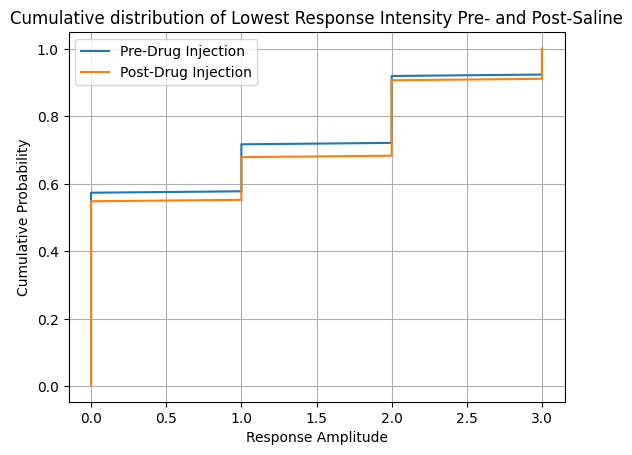

In [97]:
# Calculate CDFs
pre_amplitudes = lowest_response_intensity_all_con[:,0]
post_amplitudes = lowest_response_intensity_all_con[:,1]


pre_sorted = np.sort(pre_amplitudes)
pre_cdf = np.arange(1, len(pre_sorted) + 1) / len(pre_sorted)

post_sorted = np.sort(post_amplitudes)
post_cdf = np.arange(1, len(post_sorted) + 1) / len(post_sorted)

# Plot CDFs
plt.plot(pre_sorted, pre_cdf, label='Pre-Drug Injection')
plt.plot(post_sorted, post_cdf, label='Post-Drug Injection')

# Add labels and legend
plt.xlabel('Response Amplitude')
plt.ylabel('Cumulative Probability')
plt.title('Cumulative distribution of Lowest Response Intensity Pre- and Post-Saline')
plt.legend()

# Show plot
plt.grid(True)
plt.show()

In [93]:
# Perform KS test between two samples
ks_statistic, p_value = kstest(lowest_response_intensity_all_con[:,0], lowest_response_intensity_all_con[:,1])

# Print test results
print("KS Statistic:", ks_statistic)
print("P-value:", p_value)

KS Statistic: 0.0379746835443038
P-value: 0.9957188819308439


In [96]:
from scipy.stats import wilcoxon

# Perform the Wilcoxon signed-rank test
statistic, p_value = wilcoxon(lowest_response_intensity_all_con[:,0], lowest_response_intensity_all_con[:,1])

print("P Value:", p_value, "    Statistic:", statistic)

P Value: 0.31068097011101425     Statistic: 1800.0


In [99]:
np.save(filepath + 'lowest_response_matched_post_saline', lowest_response_intensity_all_con)

In [103]:
def count_above_half_max(array):
    max_value = max(array)
    count = 0
    
    # Find the index of the maximum value in the array
    max_index = array.argmax()
    
    # Start from the index of the maximum value and iterate downwards
    index = max_index
    while index >= 0 and array[index] >= max_value / 2:
        count += 1
        index -= 1
    
    # Start from the index of the maximum value and iterate upwards
    index = max_index + 1  # Start from the next index
    while index < len(array) and array[index] >= max_value / 2:
        count += 1
        index += 1
    
    return count

In [104]:
#  Calculating response bandwidth

# Get location of best frequency in array (peak tuning)
# Move down the array and add 1 to a counter (starts at 1) if the response next to it is significant.  Once it is not significant, move back to the BF and go the other way, doing the same.  
# Final count is the total number of responsive frequencies at the BF intensity.  
# Do this for every active cell, or every matched cell, and get the distribution of bandwidths for pre and post saline.  
# For the matched cells, calculate the difference in bandwidth pre- and post. 


def get_bandwidth(coactive,dict_1,dict_2,PRE,POST):

    bandwidth = np.zeros_like(coactive)

    # For each pair of cells in the coactive matrix, extract their tuning curves (i used later).
    for i,cell_1, cell_2 in zip(range(len(coactive[:,0])),coactive[:,0],coactive[:,1]):
                tuning_array_1 = dict_1[PRE][cell_1]['peak_tuning']
                tuning_array_2 = dict_2[POST][cell_2]['peak_tuning']

                # Extract the full row of frequencies, at the intensity where the BF is.
                BF_column_1 = tuning_array_1[:,find_max_column(tuning_array_1)]
                BF_column_2 = tuning_array_2[:,find_max_column(tuning_array_2)]

                bandwidth[i,0] = count_above_half_max(BF_column_1)
                bandwidth[i,1] = count_above_half_max(BF_column_2)

    return bandwidth

In [122]:
percent_shifted_all = []
BF_shift_all = []
pop_sizes = []
PI_shift_all = []
lowest_response_intensity_all = []
bandwidth_all = []

shift_range = 2

In [137]:


coactive = get_coactive_cells(saline_dict_1,saline_dict_2,PRE,POST)
pop_sizes.append(len(coactive))

percent_shifted_all.append(BF_percent_changed(coactive,shift_range,saline_dict_1,saline_dict_2,PRE,POST))
BF_shift_all.append(get_BF_shifts(coactive,saline_dict_1,saline_dict_2,PRE,POST))
PI_shift_all.append(get_PI_shifts(coactive,saline_dict_1,saline_dict_2,PRE,POST))
lowest_response_intensity_all.append(get_lowest_response_intensity(coactive,saline_dict_1,saline_dict_2,PRE,POST))
bandwidth_all.append(get_bandwidth(coactive,saline_dict_1,saline_dict_2,PRE,POST))

In [139]:
bandwidth_all_con = np.concatenate(bandwidth_all)

(array([[0.80696203, 0.28481013, 0.08438819, 0.04219409, 0.        ,
         0.00527426, 0.02109705, 0.        , 0.00527426, 0.        ],
        [0.87552743, 0.23206751, 0.11075949, 0.01582278, 0.        ,
         0.        , 0.01054852, 0.        , 0.        , 0.00527426]]),
 array([1. , 1.8, 2.6, 3.4, 4.2, 5. , 5.8, 6.6, 7.4, 8.2, 9. ]),
 <a list of 2 BarContainer objects>)

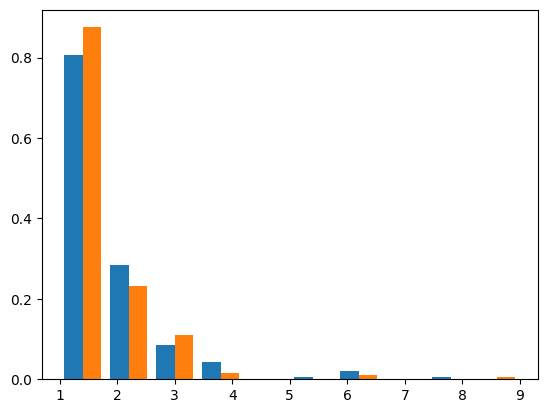

In [141]:
plt.hist(bandwidth_all_con, density=True)

In [144]:
np.save(filepath + 'bandwidths_saline',bandwidth_all_con)

In [145]:
def get_bandwidth_at_best(dict_1,dict_2,PRE,POST):    
    
    bandwidth_pre = []
    bandwidth_post = []
 
    for cell in dict_1[PRE]:
                if dict_1[PRE][cell]['active'] == True:
                    tuning_array_1 = dict_1[PRE][cell]['peak_tuning']
                    BF_column_1 = tuning_array_1[:,find_max_column(tuning_array_1)]
                    bandwidth_1 = count_above_half_max(BF_column_1)
                    bandwidth_pre.append(bandwidth_1)

    for cell in dict_2[POST]:
                if dict_2[POST][cell]['active'] == True:
                    tuning_array_2 = dict_2[POST][cell]['peak_tuning']
                    BF_column_2 = tuning_array_2[:,find_max_column(tuning_array_2)]
                    bandwidth_2 = count_above_half_max(BF_column_2)
                    bandwidth_post.append(bandwidth_2)

    return bandwidth_pre, bandwidth_post

In [147]:
bandwidth_pre_all = []
bandwidth_post_all = []

In [169]:
PRE = 'saline_1_474'
POST = 'saline_2_474'

In [170]:
bandwidth_pre, _ = get_bandwidth_all_cells(saline_dict_1,saline_dict_2,PRE,POST) 
bandwidth_pre_all.append(bandwidth_pre)

_ , bandwidth_post = get_bandwidth_all_cells(saline_dict_1,saline_dict_2,PRE,POST) 
bandwidth_post_all.append(bandwidth_post)


In [171]:
print(len(bandwidth_pre_all))
print(len(bandwidth_post_all))

8
8


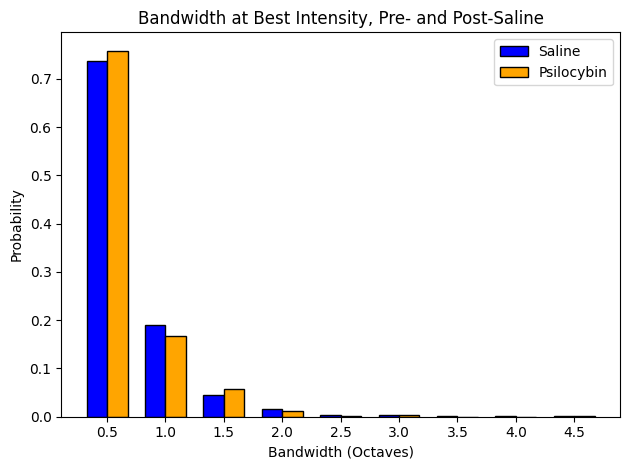

In [175]:
bandwidth_pre_all_con = np.concatenate(bandwidth_pre_all)
bandwidth_post_all_con = np.concatenate(bandwidth_post_all)
plot_comparison(bandwidth_pre_all_con,bandwidth_post_all_con)

In [176]:
np.save(filepath + 'bandwidth_all_cells_post_saline', bandwidth_post_all_con)

In [177]:
def get_activity_info(dict_1,dict_2,PRE,POST):

    matched_responsive_1 = []
    matched_non_responsive_1 = []
    matched_responsive_2 = []
    matched_non_responsive_2 = []

    matched_cells = dict_1[PRE][next(iter(dict_1[PRE]))]['matched_cells']
    matched_cells_2 = dict_2[POST][next(iter(dict_2[POST]))]['matched_cells']

    if len(matched_cells) != len(matched_cells_2):
        print("You have two different matched cells arrays here!")

    for cell in dict_1[PRE]:
            if cell in matched_cells[:,0] and dict_1[PRE][cell]['active'] == True:
                matched_responsive_1.append(cell)
            elif cell in matched_cells[:,0] and dict_1[PRE][cell]['active'] == False:
                  matched_non_responsive_1.append(cell)

    for cell in dict_2[POST]:
            if cell in matched_cells[:,1] and dict_2[POST][cell]['active'] == True:
                matched_responsive_2.append(cell)
            elif cell in matched_cells[:,1] and dict_2[POST][cell]['active'] == False:
                  matched_non_responsive_2.append(cell)
    
    # Filter coactive cells where the first column is true and the second column is false
    responsive_first_only = matched_cells[(np.isin(matched_cells[:, 0], matched_responsive_1)) & 
                                         (~np.isin(matched_cells[:, 1], matched_responsive_2))]
    
    # Filter coactive cells where the first column is true and the second column is false
    responsive_second_only = matched_cells[(~np.isin(matched_cells[:, 0], matched_responsive_1)) & 
                                         (np.isin(matched_cells[:, 1], matched_responsive_2))]
    
    responsive_both = matched_cells[(np.isin(matched_cells[:, 0], matched_responsive_1)) & 
                                         (np.isin(matched_cells[:, 1], matched_responsive_2))]
    
    non_responsive = matched_cells[(~np.isin(matched_cells[:, 0], matched_responsive_1)) & 
                                         (~np.isin(matched_cells[:, 1], matched_responsive_2))]

    total_matched_cells = len(matched_cells)
    print(total_matched_cells)

    total_responsive_both = len(responsive_both)
    total_responsive_first_only = len(responsive_first_only)
    total_responsive_second_only = len(responsive_second_only)
    total_non_responsive = len(non_responsive)

    if total_matched_cells == total_responsive_both + total_responsive_first_only + total_responsive_second_only + total_non_responsive:
        print("The lengths add up correctly.")
    else:
        print("The lengths do not add up correctly.")


    return responsive_both, responsive_first_only, responsive_second_only, non_responsive,matched_responsive_1,matched_responsive_2

In [194]:
responsive_both_all = []
responsive_first_only_all = []
responsive_second_only_all = []
non_responsive_all = []
matched_active_1_all = []
matched_active_2_all = []

In [205]:
PRE = 'saline_1_474'
POST = 'saline_2_474'

# Call the function once
result = get_activity_info(saline_dict_1, saline_dict_2, PRE, POST)

# Extract the outputs
responsive_both, responsive_first_only, responsive_second_only, non_responsive, matched_active_1, matched_active_2 = result

# Append to respective arrays
responsive_both_all.append(responsive_both)
responsive_first_only_all.append(responsive_first_only)
responsive_second_only_all.append(responsive_second_only)
non_responsive_all.append(non_responsive)
matched_active_1_all.append(matched_active_1)
matched_active_2_all.append(matched_active_2)

153
The lengths add up correctly.


In [206]:
responsive_both_con = np.concatenate(responsive_both_all)
print(responsive_both_con.shape)

responsive_first_only_con = np.concatenate(responsive_first_only_all)
print(responsive_first_only_con.shape)

responsive_second_only_con = np.concatenate(responsive_second_only_all)
print(responsive_second_only_con.shape)

non_responsive_con = np.concatenate(non_responsive_all)
print(non_responsive_con.shape)

matched_active_1_con = np.concatenate(matched_active_1_all)
print(len(matched_active_1_con))

matched_active_2_con = np.concatenate(matched_active_2_all)
print(len(matched_active_2_con))

(237, 2)
(144, 2)
(153, 2)
(537, 2)
380
390


In [207]:
total_cells = sum(len(arr) for arr in [responsive_both_con, responsive_first_only_con, responsive_second_only_con, non_responsive_con])

print(total_cells)

1071


In [208]:
perc_responsive_both = len(responsive_both_con)/total_cells * 100

print(perc_responsive_both)

perc_responsive_first_only = len(responsive_first_only_con)/total_cells * 100

print(perc_responsive_first_only)

perc_responsive_second_only = len(responsive_second_only_con)/total_cells * 100

print(perc_responsive_second_only)

perc_non_responsive = len(non_responsive_con)/total_cells * 100

print(perc_non_responsive)

22.128851540616246
13.445378151260504
14.285714285714285
50.14005602240896


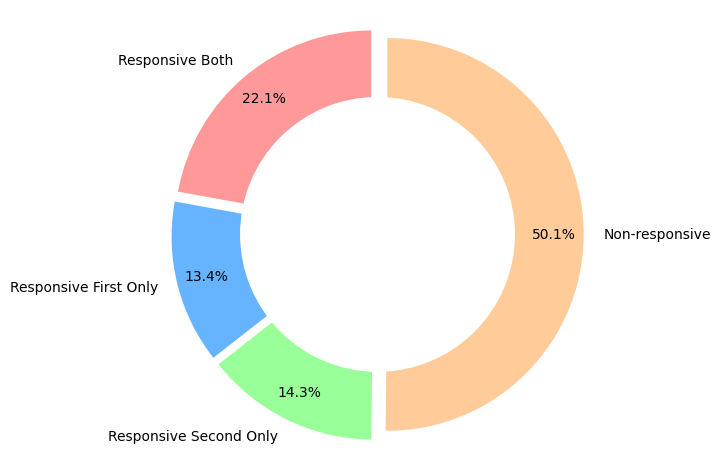

In [209]:
# Pie chart
labels = ['Responsive Both', 'Responsive First Only', 'Responsive Second Only', 'Non-responsive']
sizes = [perc_responsive_both,perc_responsive_first_only, perc_responsive_second_only, perc_non_responsive]
# Colors
colors = ['#ff9999','#66b3ff','#99ff99','#ffcc99']
# Explosion
explode = (0.05, 0.05, 0.05, 0.05)

plt.pie(sizes, colors=colors, labels=labels, autopct='%1.1f%%', startangle=90, pctdistance=0.85, explode=explode)
# Draw circle
centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
# Equal aspect ratio ensures that pie is drawn as a circle
plt.axis('equal')
# Adjust aspect ratio to make the sections of the donut plot equal
plt.gca().set_aspect('equal', adjustable='box')
plt.tight_layout()
plt.show()

In [259]:
def get_bandwidth_all_cells(dict_1,dict_2,PRE,POST,intensity):    
    
    bandwidth_pre = []
    bandwidth_post = []
 
    for cell in dict_1[PRE]:
                if dict_1[PRE][cell]['active'] == True:
                    tuning_array_1 = dict_1[PRE][cell]['peak_tuning']
                    BF_column_1 = tuning_array_1[:,intensity]
                    if any(value >= z_thresh for value in BF_column_1):
                        bandwidth_1 = count_above_half_max(BF_column_1)
                        bandwidth_pre.append(bandwidth_1)

    for cell in dict_2[POST]:
                if dict_2[POST][cell]['active'] == True:
                    tuning_array_2 = dict_2[POST][cell]['peak_tuning']
                    BF_column_2 = tuning_array_2[:,intensity]
                    if any(value >= z_thresh for value in BF_column_2):
                        bandwidth_2 = count_above_half_max(BF_column_2)
                        bandwidth_post.append(bandwidth_2)
                        print(cell)

    return bandwidth_pre, bandwidth_post

In [279]:
bandwidth_50_pre_all = []
bandwidth_50_post_all = []

In [287]:
PRE = 'saline_1_474'
POST = 'saline_2_474'

result = get_bandwidth_all_cells(saline_dict_1,saline_dict_2,PRE,POST,1)

bandwidth_pre,bandwidth_post = result

bandwidth_50_pre_all.append(bandwidth_pre)
bandwidth_50_post_all.append(bandwidth_post)

print(len(bandwidth_50_pre_all))



35
53
63
68
75
76
81
93
109
113
120
125
129
135
143
152
157
159
172
183
196
205
211
218
234
242
243
273
292
301
349
355
356
366
392
401
405
411
423
441
456
465
467
564
591
624
627
646
674
723
781
794
825
886
892
916
984
1291
8


In [288]:
bandwidth_50_pre_con = np.concatenate(bandwidth_50_pre_all)
bandwidth_50_post_con = np.concatenate(bandwidth_50_post_all)

print(len(bandwidth_50_pre_con))
print(len(bandwidth_50_post_con))

401
326


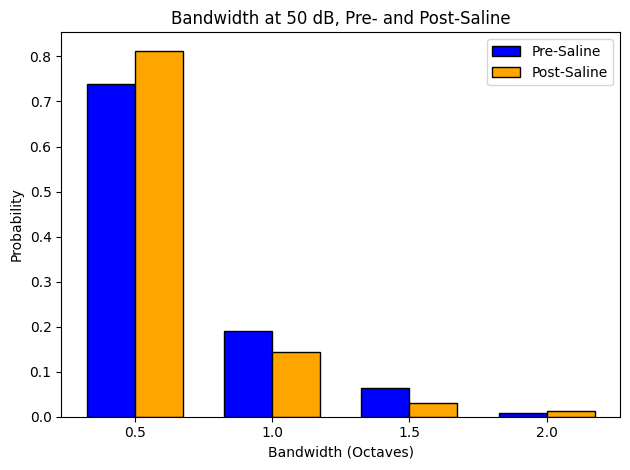

In [292]:
plot_comparison(bandwidth_50_pre_con,bandwidth_50_post_con)

In [290]:
from scipy.stats import mannwhitneyu

statistic, p_value = mannwhitneyu(bandwidth_50_pre_con, bandwidth_50_post_con)

print(f"Mann-Whitney U statistic: {statistic}")
print(f"P-value: {p_value}")

Mann-Whitney U statistic: 70360.0
P-value: 0.01533104912683766


In [293]:
np.save(filepath + 'bandwidth_50_saline_pre_allcells',bandwidth_50_pre_con)
np.save(filepath + 'bandwidth_50_saline_post_allcells',bandwidth_50_post_con)

In [ ]:
np.load(filepath + )